In [3]:
import pandas as pd
import numpy as np

In [4]:
hs_bat = pd.read_csv ('HS_stats_bat.csv')
lions_bat = pd.read_csv ('Lions_stats_bat.csv')
lords_bat = pd.read_csv ('LO_stats_bat.csv')
mi_bat = pd.read_csv ('MI_stats_bat.csv')
ph_bat = pd.read_csv ('PH_stats_bat.csv')
srh_bat = pd.read_csv ('SRH_stats_bat.csv')

In [6]:
df = pd.concat([hs_bat, lions_bat, lords_bat, mi_bat, ph_bat, srh_bat])
df = df.reset_index()
del df['index']
df.head()

,player,Matches,Innings,Not Outs,Runs,Balls Faced,Average,Strike Rate,100s,50s,4s,6s
0,Sunil Amla,3,3,1.0,140,82,70.0,170.731707,0,1,6,12
1,ABD Afridi,3,2,1.0,62,64,62.0,96.875000,0,0,5,1
2,Babar Gayle,3,3,0.0,51,71,17.0,71.830986,0,0,3,2
3,D'Arcy Hogg,3,1,1.0,25,21,inf,119.047619,0,0,2,1
4,Virat Tendulkar,3,3,1.0,21,23,10.5,91.304348,0,0,2,1


In [8]:
df2 = df.groupby(['player']).sum()
del df2['Average']
del df2['Strike Rate']
df2

,Matches,Innings,Not Outs,Runs,Balls Faced,100s,50s,4s,6s
player,,,,,,,,,
AB De Kock,3,2,0.0,9,18,0,0,1,0
ABD Afridi,3,2,1.0,62,64,0,0,5,1
ABD Villiers,3,2,0.0,18,27,0,0,1,0
Adalard Wessex,1,1,0.0,0,5,0,0,0,0
Albus Dumbledore,3,3,0.0,37,50,0,0,1,2
...,...,...,...,...,...,...,...,...,...
Virat King Kohli,3,3,1.0,33,27,0,0,3,1
Virat Shankar,1,1,1.0,8,10,0,0,1,0
Virat Tendulkar,3,3,1.0,21,23,0,0,2,1


In [10]:
df2.insert(5,"Average", df2['Runs'] / (df2['Innings'] - df2['Not Outs']))
# df2['avg'] = df2['total_runs'] / df2['inning'] - df2['not_outs']

In [11]:
df2.insert(6,"Strike Rate", df2['Runs']*100 / df2['Balls Faced'])

In [12]:
df2 = df2.sort_values(by ='Runs', ascending = 0)
df2

,Matches,Innings,Not Outs,Runs,Balls Faced,Average,Strike Rate,100s,50s,4s,6s
player,,,,,,,,,,,
David Williamson,3,3,1.0,152,113,76.0,134.513274,0,2,8,7
Gauti Gambhir,3,3,1.0,148,105,74.0,140.952381,0,2,7,9
Sunil Amla,3,3,1.0,140,82,70.0,170.731707,0,1,6,12
Wiaan Claasens,3,3,2.0,125,102,125.0,122.549020,0,1,7,4
Ashutosh Kumar Kushwaha,3,3,1.0,121,81,60.5,149.382716,0,1,7,7
...,...,...,...,...,...,...,...,...,...,...,...
Rodaidh O'Connelli,3,2,0.0,0,6,0.0,0.000000,0,0,0,0
Billy Ahmed,3,0,0.0,0,0,NaN,NaN,0,0,0,0
Josh Buttler,2,1,0.0,0,2,0.0,0.000000,0,0,0,0


In [13]:
df2 = df2.rename(columns={'player': 'Player Name', 'games': 'Matches', 'inning': 'Innings', 'not_outs': 'Not Outs', 'total_runs': 'Runs', 'balls_faced': 'Balls Faced', 
                         'average': 'Average', 'strike_rate' : 'Strike Rate', 'hundreds':'100s', 'fifties':'50s', 'fours':'4s', 'sixes':'6s'})

In [14]:
df2

,Matches,Innings,Not Outs,Runs,Balls Faced,Average,Strike Rate,100s,50s,4s,6s
player,,,,,,,,,,,
David Williamson,3,3,1.0,152,113,76.0,134.513274,0,2,8,7
Gauti Gambhir,3,3,1.0,148,105,74.0,140.952381,0,2,7,9
Sunil Amla,3,3,1.0,140,82,70.0,170.731707,0,1,6,12
Wiaan Claasens,3,3,2.0,125,102,125.0,122.549020,0,1,7,4
Ashutosh Kumar Kushwaha,3,3,1.0,121,81,60.5,149.382716,0,1,7,7
...,...,...,...,...,...,...,...,...,...,...,...
Rodaidh O'Connelli,3,2,0.0,0,6,0.0,0.000000,0,0,0,0
Billy Ahmed,3,0,0.0,0,0,NaN,NaN,0,0,0,0
Josh Buttler,2,1,0.0,0,2,0.0,0.000000,0,0,0,0


In [15]:
df2.to_csv('Final_stats.csv')

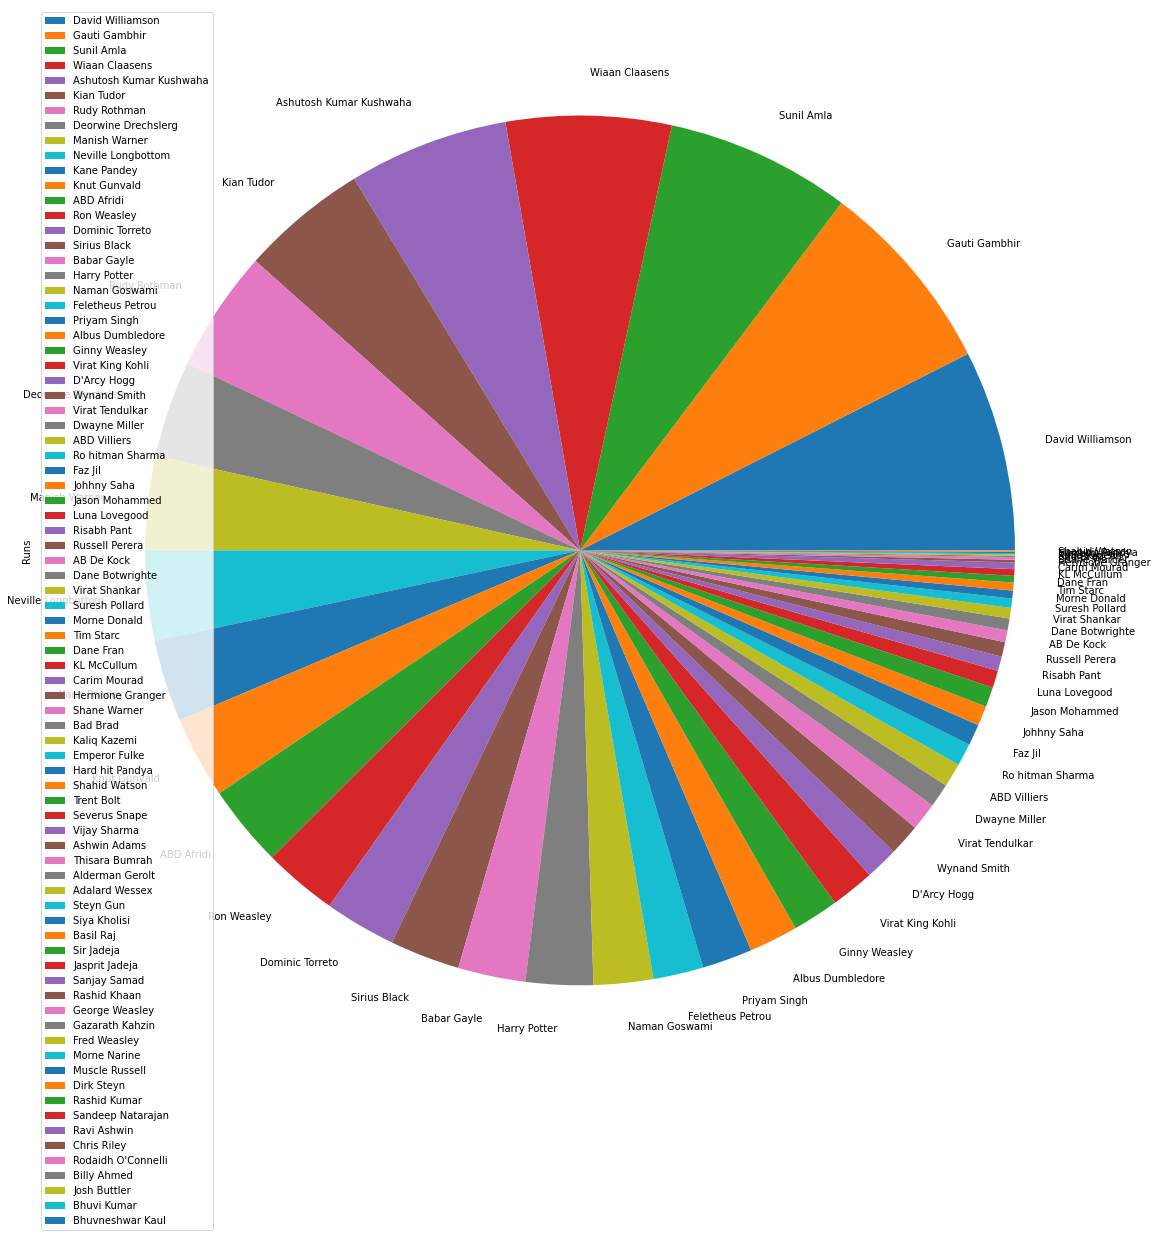

In [17]:
plot = df2.plot.pie(y='Runs', figsize=(20, 20))

In [18]:
hs_bol = pd.read_csv ('HS_stats_bol.csv')
lions_bol = pd.read_csv ('Lions_stats_bol.csv')
lords_bol = pd.read_csv ('LO_stats_bol.csv')
mi_bol = pd.read_csv ('MI_stats_bol.csv')
ph_bol = pd.read_csv ('PH_stats_bol.csv')
srh_bol = pd.read_csv ('SRH_stats_bol.csv')

In [19]:
df3 = pd.concat([hs_bol, lions_bol, lords_bol, mi_bol, ph_bol, srh_bol])
df3 = df3.reset_index()
del df3['index']
df3.head()

,player,games,inning,overs,total_wickets,runs_conceded,ave,economy_rate,strike_rate,fifers,fourfers
0,Russell Perera,3,3,11.0,8,28,3.500000,2.545455,8.25,0,1
1,Tim Starc,3,3,11.2,6,29,4.833333,2.589286,11.20,1,0
2,Jasprit Jadeja,3,3,12.0,5,55,11.000000,4.583333,14.40,0,0
3,Suresh Pollard,2,2,6.0,1,26,26.000000,4.333333,36.00,0,0
4,D'Arcy Hogg,3,3,7.0,0,80,inf,11.428571,inf,0,0


In [20]:
df3 = df3.groupby(['player']).sum()
df3['ave'] = df3['runs_conceded'] / df3['total_wickets']
df3['economy_rate'] = df3['runs_conceded'] / df3['overs']
df3['strike_rate'] = df3['overs']*6 / df3['total_wickets']
df3

,games,inning,overs,total_wickets,runs_conceded,ave,economy_rate,strike_rate,fifers,fourfers
player,,,,,,,,,,
Adalard Wessex,3,3,12.0,3,63,21.000000,5.250000,24.00,0,0
Alderman Gerolt,3,3,3.0,0,42,inf,14.000000,inf,0,0
Ashutosh Kumar Kushwaha,3,3,12.0,3,66,22.000000,5.500000,24.00,0,0
Ashwin Adams,2,2,6.0,2,18,9.000000,3.000000,18.00,0,0
Bad Brad,3,3,12.0,3,47,15.666667,3.916667,24.00,0,0
Basil Raj,1,1,4.0,0,24,inf,6.000000,inf,0,0
Bhuvi Kumar,3,3,12.0,0,74,inf,6.166667,inf,0,0
Bhuvneshwar Kaul,3,3,7.0,1,55,55.000000,7.857143,42.00,0,0
Billy Ahmed,3,3,12.0,1,66,66.000000,5.500000,72.00,0,0


In [22]:
df3 = df3.sort_values(by ='total_wickets', ascending = 0)
df3

,games,inning,overs,total_wickets,runs_conceded,ave,economy_rate,strike_rate,fifers,fourfers
player,,,,,,,,,,
Russell Perera,3,3,11.0,8,28,3.500000,2.545455,8.25,0,1
Tim Starc,3,3,11.2,6,29,4.833333,2.589286,11.20,1,0
Dirk Steyn,3,3,12.0,5,77,15.400000,6.416667,14.40,0,1
Jasprit Jadeja,3,3,12.0,5,55,11.000000,4.583333,14.40,0,0
Hard hit Pandya,2,2,8.0,3,26,8.666667,3.250000,16.00,0,0
Ashutosh Kumar Kushwaha,3,3,12.0,3,66,22.000000,5.500000,24.00,0,0
Bad Brad,3,3,12.0,3,47,15.666667,3.916667,24.00,0,0
Carim Mourad,3,3,3.0,3,30,10.000000,10.000000,6.00,0,0
Dane Botwrighte,3,3,9.0,3,54,18.000000,6.000000,18.00,0,0


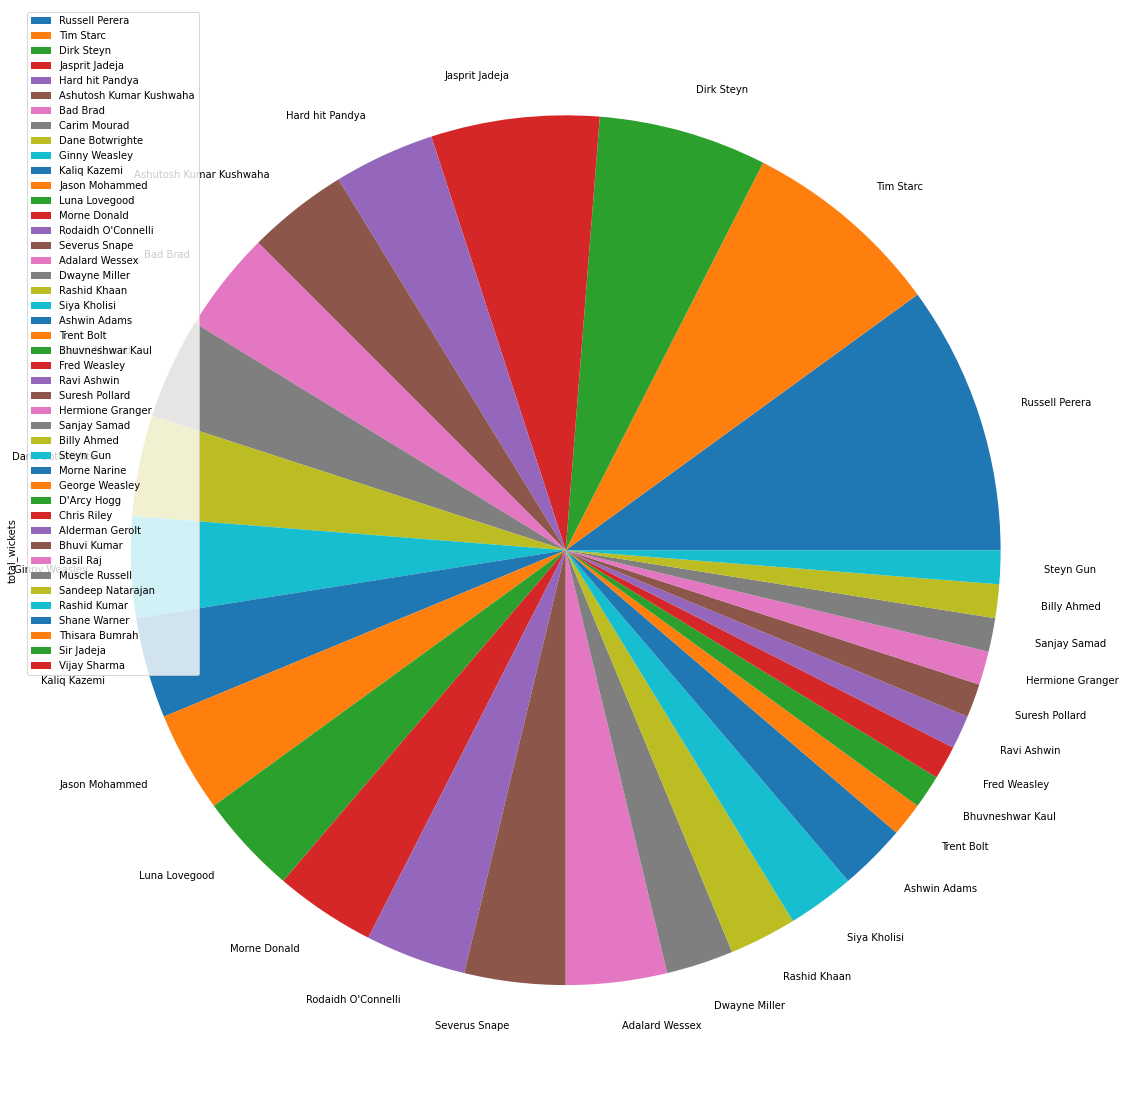

In [23]:
plot1 = df3.plot.pie(y='total_wickets', figsize=(20, 20))

In [24]:
df3.to_csv('Final_stats_bol.csv')